# 图片加入卡通效果

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img

## 预览图片

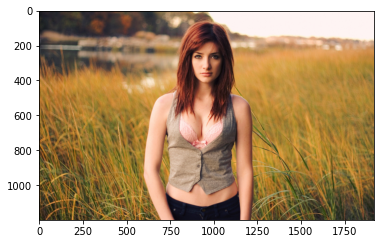

In [3]:
img = cv.imread('./images/wallpaper.jpg')

out_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(out_img)
plt.show()

## 边缘遮罩

### 在卡通效果中，通常非常强调图像边缘的厚度。

In [14]:
def edge_mask(img, line_size, blur_size):
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_blur = cv.medianBlur(gray_img, ksize=blur_size)
    edge_img = cv.adaptiveThreshold(gray_blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, line_size, blur_size)
    return edge_img

In [15]:
line_size, blur_size=7,7

edges = edge_mask(img, line_size, blur_size)

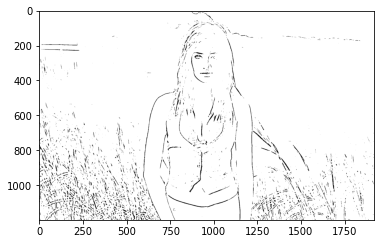

In [16]:
plt.imshow(edges, cmap='gray')
plt.show()

## 减少颜色数量

### 照片和草图/卡通之间的主要区别在于不同颜色的数量。与高清照片相比，卡通素描的颜色要少得多。
### 因此，使用了一种名为颜色量化的方法。这将减少照片中的颜色数量。这里使用K均值聚类算法

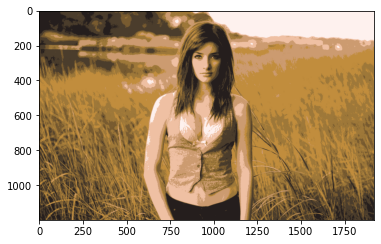

In [17]:
k = total_color = 8

# Transform the image
data = np.float32(img).reshape((-1, 3))

# Determine criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
# under the instruction of examples
ret, label, center = cv.kmeans(
    data, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
result = center[label.flatten()]
result = result.reshape(img.shape)

out_img = cv.cvtColor(result, cv.COLOR_BGR2RGB)
plt.imshow(out_img)
plt.show()


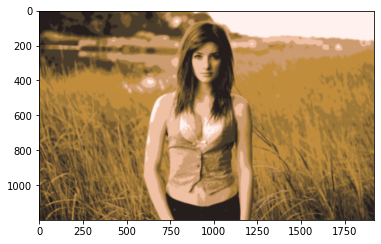

In [18]:
# 双边滤波
blurred = cv.bilateralFilter(result, d=10, sigmaColor=250, sigmaSpace=250)

out_img = cv.cvtColor(blurred, cv.COLOR_BGR2RGB)
plt.imshow(out_img)
plt.show()

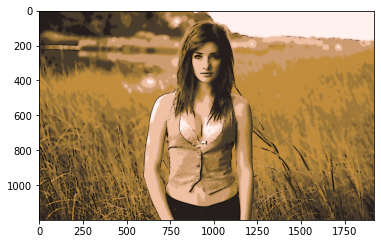

In [19]:
#blurred and edges
cartoon = cv.bitwise_and(blurred, blurred, mask=edges)

out_img = cv.cvtColor(cartoon, cv.COLOR_BGR2RGB)
plt.imshow(out_img)
plt.show()

# 另外一种方法

## 应用带有轮廓的卡通效果

In [20]:
# Colour Quantization
def ColourQuantization(image, K=9):
    Z = image.reshape((-1, 3))
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    _, label, center = cv.kmeans(
        Z, K, None, criteria, 1, cv.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((image.shape))
    return res2


In [21]:
# to get countours
def Countours(image):
    contoured_image = image
    gray = cv.cvtColor(contoured_image, cv.COLOR_BGR2GRAY)
    edged = cv.Canny(gray, 200, 200)
    contours, hierarchy = cv.findContours(
        edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)[-2:]
    cv.drawContours(contoured_image, contours,
                    contourIdx=-1, color=6, thickness=1)
    return contoured_image


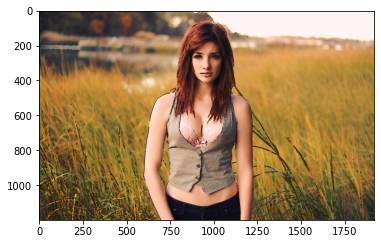

In [23]:
contoured = Countours(img)

out_img = cv.cvtColor(contoured, cv.COLOR_BGR2RGB)
plt.imshow(out_img)
plt.show()

In [25]:
colored = ColourQuantization(contoured)

out_img = cv.cvtColor(colored, cv.COLOR_BGR2RGB)
plt.imshow(out_img)
plt.show()